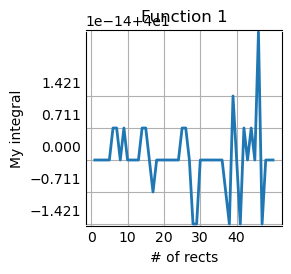

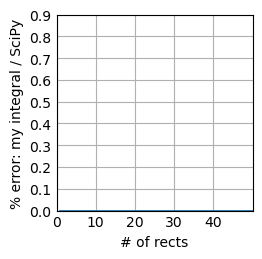

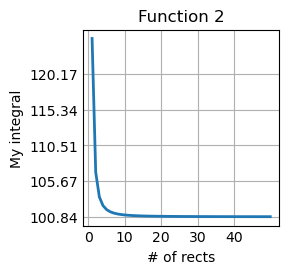

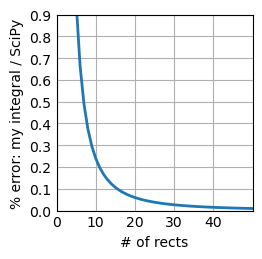

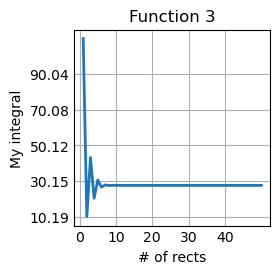

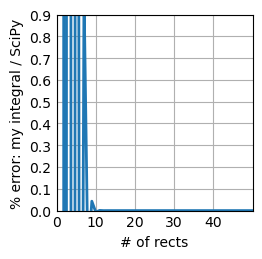

In [36]:
import scipy.integrate as scipyIntegral
import math as mt
import matplotlib.pyplot as plt
import numpy as np

a = -5
b = 5
maxRects = 50

def func1(x):
    y = -0.5*x + 4.0
    return y

def func2(x):
    y = -0.29*x**2 - x + 12.5
    return y

def func3(x):
    y = 1.0 + 10*(x + 1.0)*mt.exp(-x*x)
    return y

funcList = [func1, func2, func3]

def areaUnderFunction(curve, rectNum=int, startPoint=float, endPoint=float):
    areas = []
    domain = endPoint - startPoint
    del_x = domain/rectNum
    for point in range(rectNum):
        x = startPoint + (del_x * point)
        width = del_x
        height = curve(x + (del_x/2))
        area = width * height
        areas.append(area)
    return sum(areas)

def percentError(actual, estimate):
    error = estimate - actual
    try:
        perError = error/actual
        return perError * 100
    except ZeroDivisionError:
        return 0

for func in funcList: # For each function in the list of functions
    plt.style.use('_mpl-gallery')
    # make data
    x = np.linspace(1, maxRects, maxRects)
    y_1 = []
    y_2 = []
    for rectNum in range(1, maxRects+1): # For each number of rectangles
            
        writtenArea = areaUnderFunction(func, rectNum, a, b)
        actualArea = scipyIntegral.quad(func, a, b)[0]
        y_1.append(writtenArea)
        y_2.append(percentError(actualArea, writtenArea))
        
    # Plot the integral from my code
    
    y1_max = max(y_1) 
    y1_min = min(y_1)
    y1_range = y1_max - y1_min
    
    fig, ax = plt.subplots()

    ax.plot(x, y_1, linewidth=2.0)
    
    ax.set(title = "Function " + str(funcList.index(func) + 1),
           xlim=(0, maxRects), 
           xticks=np.arange(0, maxRects, maxRects/5), 
           xlabel='# of rects',
           ylim=(y1_min, y1_max), 
           yticks=np.arange(y1_min, y1_max, y1_range/5),
           ylabel = 'My integral')
    
    ax.autoscale()

    plt.show()
    
    
    # Plot the percent error
    fig, ax = plt.subplots()

    ax.plot(x, y_2, linewidth=2.0)

    ax.set(xlim=(0, maxRects), 
           xticks=np.arange(0, maxRects, maxRects/5), 
           xlabel='# of rects',
           ylim=(0, .01), 
           yticks=np.arange(0, 1, 0.1),
           ylabel = '% error: my integral / SciPy')

    plt.show()
    

In [ ]:
x = np.linspace(1, maxRects, maxRects)
print(x)